In [2]:
# Installing the fairlearn package
!pip install fairlearn

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio

In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [ ]:
The data preprocessing done was which would affect the 
training and test.According to the OpenML dataset description, values 3 and 4 in both X3 and X4
were originally intended to represent "others". However, the dataset contained additional values,
including 4, 5, and 6. To prevent confusion and simplify the input for the models, I combined these
values under the "others" category in their respective columns.

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#reading file
file_path = 'default of credit card clients.xls'

# Read Excel file into a DataFrame
df = pd.read_excel(file_path)

print(df)

# removing the first column which only contained ids
#removing the first row as it was the name of each column in a string type
X=df.drop(columns=['Y'])
X=X.drop(columns=['Unnamed: 0'])

X=X.drop(index=0)

y=df['Y']
y=y.drop(index=0)

y=pd.to_numeric(y)
y.head()

#in dataset desription only say other has one value so merged aditional ones into 4 for X3 and 3 for X4
X = X[X['X3'] != 0]
X['X3'] = X['X3'].replace({5: 4, 6: 4})
X = X[X['X4'] != 0]
X['X4'] = X['X4'].replace({4:3,5: 3, 6: 3})
y = y[X.index]  # Update y to match the filtered rows in X
for column in X:
    X[column] = pd.to_numeric(X[column])
    X[column].head()


#minmax scaler or standard scaler

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#
#sensitive_test = X_test['X2']



y.head()

      Unnamed: 0         X1   X2         X3        X4   X5     X6     X7  \
0             ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2   
1              1      20000    2          2         1   24      2      2   
2              2     120000    2          2         2   26     -1      2   
3              3      90000    2          2         2   34      0      0   
4              4      50000    2          2         1   37      0      0   
...          ...        ...  ...        ...       ...  ...    ...    ...   
29996      29996     220000    1          3         1   39      0      0   
29997      29997     150000    1          3         2   43     -1     -1   
29998      29998      30000    1          2         2   37      4      3   
29999      29999      80000    1          3         1   41      1     -1   
30000      30000      50000    1          2         1   46      0      0   

          X8     X9  ...        X15        X16        X17       X18       X19  \
0     

1    1
2    1
3    0
4    0
5    0
Name: Y, dtype: int64

In [14]:
X['X3'].unique()

array([2, 1, 3, 4])

In [15]:
X['X4'].unique()

array([1, 2, 3])

seeing selection rates  for each of X2, X3 and X4

figure below :1 is male and 2 is female


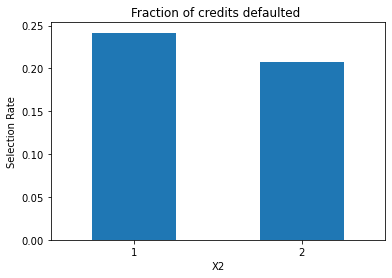

In [7]:
#i skipped the index [0] because it has labels in that row
selection_rates = MetricFrame(
    metrics=selection_rate, y_true=df['Y'][1:], y_pred=df['Y'][1:], sensitive_features=df['X2'][1:]
)



fig = selection_rates.by_group.plot.bar(
    legend=False, rot=0, title="Fraction of credits defaulted ", ylabel='Selection Rate'
)
print("figure below :1 is male and 2 is female")

figure below X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).


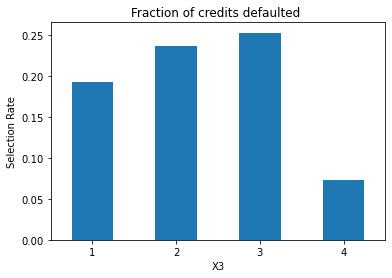

In [16]:
import matplotlib.pyplot as plt
from fairlearn.metrics import MetricFrame, selection_rate

# Create MetricFrame with the filtered data
selection_rates = MetricFrame(
    metrics=selection_rate,
    y_true=y,
    y_pred=y,
    sensitive_features=X['X3']
)

# Create the bar plot
fig = selection_rates.by_group.plot.bar(
    legend=False, rot=0, title="Fraction of credits defaulted ", ylabel='Selection Rate'
)

# Set the x-axis labels
plt.xticks(range(len(selection_rates.by_group)), selection_rates.by_group.index)

# Print information about X3
print("figure below X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).")

# Show the plot
plt.show()


In [18]:
X['X3'].value_counts()
#

2    14024
1    10581
3     4873
4      454
Name: X3, dtype: int64

 X4: Marital status (1 = married; 2 = single; 3 = others)


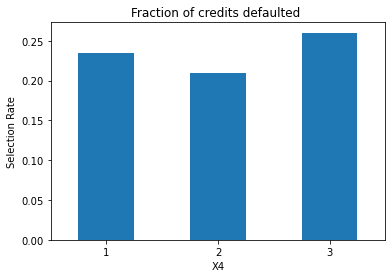

In [20]:
selection_rates = MetricFrame(
    metrics=selection_rate, y_true=y, y_pred=y, sensitive_features=X['X4']
)



fig = selection_rates.by_group.plot.bar(
    legend=False, rot=0, title="Fraction of credits defaulted ", ylabel='Selection Rate'
)
print(" X4: Marital status (1 = married; 2 = single; 3 = others)")

In [24]:
print(y.shape)

(29932,)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

# Assuming X_train, X_test, y_train, and y_test are already defined

# Train a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

# Measure accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Measure AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc}")


Accuracy: 0.6501074578496786
AUC: 0.7595314061534778


seeing fairness metircs x2

array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='X2'>,
        <AxesSubplot:title={'center':'precision'}, xlabel='X2'>,
        <AxesSubplot:title={'center':'false positive rate'}, xlabel='X2'>],
       [<AxesSubplot:title={'center':'false negative rate'}, xlabel='X2'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='X2'>,
        <AxesSubplot:xlabel='X2'>],
       [<AxesSubplot:xlabel='X2'>, <AxesSubplot:xlabel='X2'>,
        <AxesSubplot:xlabel='X2'>]], dtype=object)

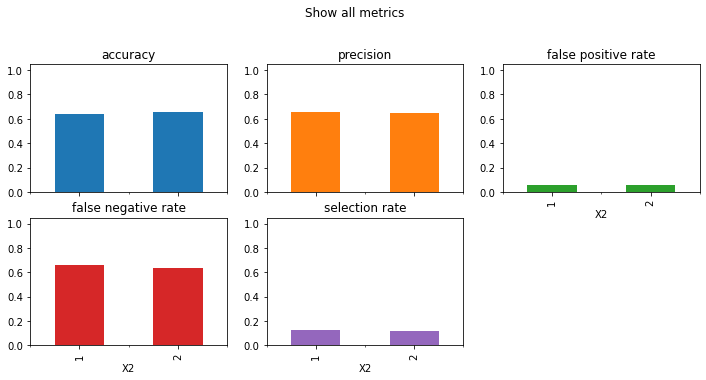

In [28]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
# Analyze metrics using MetricFrame
metrics = {
    "accuracy": balanced_accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=X_test["X2"]
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    ylim=[0,1.05],
    title="Show all metrics",
)


In [29]:

# Statistical Parity
stat_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=X_test["X2"])
print(f"Statistical Parity Difference: {stat_parity_diff}")

stat_parity_rto = demographic_parity_ratio(y_test, y_pred, sensitive_features=X_test["X2"])
print(f"Statistical Parity ratio: {stat_parity_rto}")

# Equalized Odds
equal_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=X_test["X2"])
print(f"Equalized Odds Difference: {equal_odds_diff}")

equal_odds_rto = equalized_odds_ratio(y_test, y_pred, sensitive_features=X_test["X2"])
print(f"Equalized Odds Ratio: {equal_odds_rto}")

Statistical Parity Difference: 0.004971399964231016
Statistical Parity ratio: 0.9599928694403917
Equalized Odds Difference: 0.01998232270369593
Equalized Odds Ratio: 0.945012673135513


seeing fairness metircs x3

array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='X3'>,
        <AxesSubplot:title={'center':'precision'}, xlabel='X3'>,
        <AxesSubplot:title={'center':'false positive rate'}, xlabel='X3'>],
       [<AxesSubplot:title={'center':'false negative rate'}, xlabel='X3'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='X3'>,
        <AxesSubplot:xlabel='X3'>],
       [<AxesSubplot:xlabel='X3'>, <AxesSubplot:xlabel='X3'>,
        <AxesSubplot:xlabel='X3'>]], dtype=object)

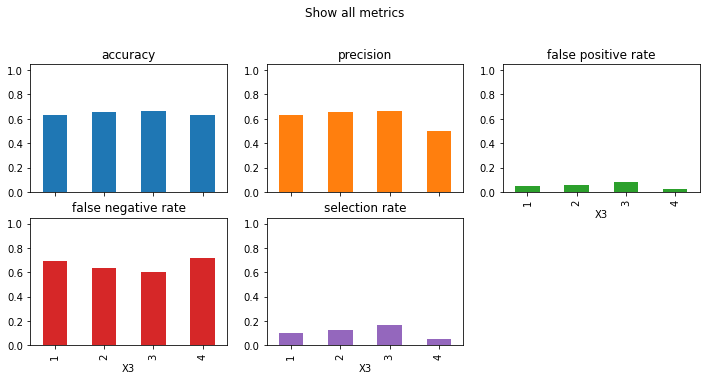

In [30]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
# Analyze metrics using MetricFrame
metrics = {
    "accuracy": balanced_accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=X_test["X3"]
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    ylim=[0,1.05],
    title="Show all metrics",
)


In [31]:

# Statistical Parity
stat_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=X_test["X3"])
print(f"Statistical Parity Difference: {stat_parity_diff}")

stat_parity_rto = demographic_parity_ratio(y_test, y_pred, sensitive_features=X_test["X3"])
print(f"Statistical Parity ratio: {stat_parity_rto}")

# Equalized Odds
equal_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=X_test["X3"])
print(f"Equalized Odds Difference: {equal_odds_diff}")

equal_odds_rto = equalized_odds_ratio(y_test, y_pred, sensitive_features=X_test["X3"])
print(f"Equalized Odds Ratio: {equal_odds_rto}")

Statistical Parity Difference: 0.12018869391669475
Statistical Parity ratio: 0.28869458505905815
Equalized Odds Difference: 0.11428571428571432
Equalized Odds Ratio: 0.34012578616352207


seeing fairness metircs x4

array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='X4'>,
        <AxesSubplot:title={'center':'precision'}, xlabel='X4'>,
        <AxesSubplot:title={'center':'false positive rate'}, xlabel='X4'>],
       [<AxesSubplot:title={'center':'false negative rate'}, xlabel='X4'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='X4'>,
        <AxesSubplot:xlabel='X4'>],
       [<AxesSubplot:xlabel='X4'>, <AxesSubplot:xlabel='X4'>,
        <AxesSubplot:xlabel='X4'>]], dtype=object)

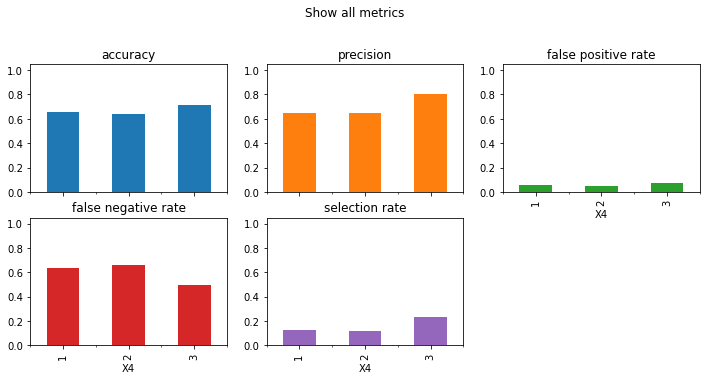

In [32]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
# Analyze metrics using MetricFrame
metrics = {
    "accuracy": balanced_accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=X_test["X4"]
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    ylim=[0,1.05],
    title="Show all metrics",
)


In [33]:

# Statistical Parity
stat_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=X_test["X4"])
print(f"Statistical Parity Difference: {stat_parity_diff}")

stat_parity_rto = demographic_parity_ratio(y_test, y_pred, sensitive_features=X_test["X4"])
print(f"Statistical Parity ratio: {stat_parity_rto}")

# Equalized Odds
equal_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=X_test["X4"])
print(f"Equalized Odds Difference: {equal_odds_diff}")

equal_odds_rto = equalized_odds_ratio(y_test, y_pred, sensitive_features=X_test["X4"])
print(f"Equalized Odds Ratio: {equal_odds_rto}")

Statistical Parity Difference: 0.1185789018250472
Statistical Parity ratio: 0.49406335221313197
Equalized Odds Difference: 0.1599713055954089
Equalized Odds Ratio: 0.6800573888091822
